In [2]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

In [3]:
pi=numpy.pi
convert=29979245800.0*2*pi # cm^-1 to Hz

In [4]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VW', sep='\s+',header=0)
dW=pd.read_csv('W_BCC', sep='\s+',header=0)
dSe=pd.read_csv('w_Se8', sep='\s+',header=0)
wSe=dSe['x']*convert
wW=dW['x']*convert # kj/mol to eV
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VW']*convert #THZ to 

# Formation energy as  chemical potential vary


 #### Total Energies in eV

In [5]:
E0=-14644858.463124419 # pristine
E1=-14711404.113635940 # addon S
E2=-14578308.639903018 # mono S vacancy
E3=-14511759.369944071 # di S vacancy up&down
E4=-14511758.944663303 # di S vacancy neighboring
E5=-14192151.211700918 # -14192151.211700918 mono Mo vacancy
E_WSe2=-585793.321771426 # primtitive
ESe8=-66547.32759558575*8   #8 atoms in unitcell
EW=-452699.40742144105*2 # Total energy in eV

In [6]:
p0=1013250  # atm to g/(cm s^2) 
p=4.59020389e-02*p0 
kk=1.380649e-16 # erg/k (cm^2.g/ks^2)
k=8.617333262145e-05 # ev/k
h=6.62607015e-27  # erg.s 
hb=6.582119569e-16 # eV.s
hbar=1.054571817e-27 # erg.s
sigma=8
m=1.04907603472e-21
IA=4.149045888664045e-37 
IB=4.149088585718857e-37
IC=7.612594467348306e-37

In [7]:
D=[]
E=[]
mu_0=[]

I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
for T in range(1,1600,20):
        A=np.log((((2*pi*m)**(3/2))*((kk*T)**(5/2)))/(p0*(h**3)))
        B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*kk*T)/(h**2))**(3/2))*I)
        temp=numpy.array([(np.log(1-math.exp(-(hbar*i)/(kk*T)))) for i in wSe])
        C=np.sum(temp)
        E.append(k*T*np.log(p/p0))
        mu_0.append(-k*T*(A+B-C)) 
        
#
#print('E',E)
#print('mu_0', mu_0)
temp2=numpy.array([(hb*i)/(2) for i in wSe])
D=np.sum(temp2)
#print('D',D)
mu_S8=np.array(mu_0) + np.array(E) + D + ESe8 
#print('mu_S8',mu_S8)

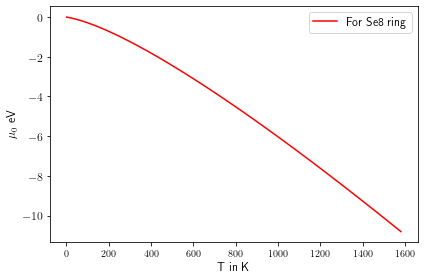

In [8]:
T=arange(1,1600,20)
plt.plot(T,mu_0, 'red', label='For Se8 ring') 
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{0}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

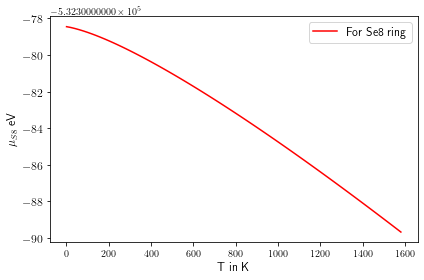

In [9]:
T=arange(1,1600,20)
plt.plot(T,mu_S8, 'red', label='For Se8 ring')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{S8}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

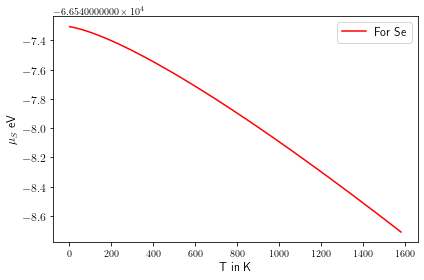

In [10]:
mu_Se=np.array(mu_S8)/8
plt.plot(T,mu_Se, 'red', label='For Se')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{S}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [11]:
def free_energy(omega):
   F=[]
  
   omega = numpy.array(omega)
   for T in arange(1,1600,20):
      
     temp3=numpy.array([(hb*i/2 + k*T*np.log(1-math.exp(-(hb*i)/(k*T)))) for i in omega])
     F.append(numpy.sum(temp3))


   return F

In [12]:
def DeltaF(X,Y):
   deltaF=[]
   F1=free_energy(X)
   F2=free_energy(Y)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 

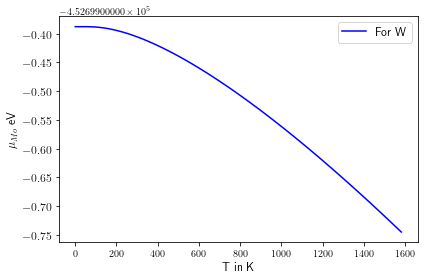

In [13]:
Fphon=free_energy(wW)
Fphon=np.array(Fphon)

V= 0.292849E+02 # volume of unitcell A^3
pp= 7.329633135876344e-05 # at 2000 k
PV=pp*V*6.3242093e-07 # to eV

mu_W=(1/2)*(EW+PV+ Fphon)



plt.plot(T,mu_W, 'blue', label='For W')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{Mo}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muMo_T.pdf')

In [14]:
def conc(r,g):
   rho=[]
   T=arange(1,1600,20)
   t=k*T
   for i,j in zip(r,t): 
       temp=(g)*math.exp(-i/j)
       rho.append(temp)
      
   return rho

In [15]:
addS = [E1-E0-a + b for a, b in zip(mu_Se, DeltaF(w1,w0))]
VS = [E2-E0+a + b for a, b in zip(mu_Se, DeltaF(w2,w0))]
VS2 = [E3-E0+2*a + b for a, b in zip(mu_Se, DeltaF(w3,w0))]
VS22 = [E4-E0+2*a + b for a, b in zip(mu_Se, DeltaF(w4,w0))]
VW = [E5-E0+a + b for a, b in zip(mu_W, DeltaF(w5,w0))]
#print(mu_W)
#print(DeltaF(w5,w0))

<ipython-input-16-f2231db820df>:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(1/T,np.log(rho1) , 'b', label='addon S')
<ipython-input-16-f2231db820df>:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(1/T, np.log(rho2), 'r', label='Mono S vacancy')
<ipython-input-16-f2231db820df>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(1/T, np.log(rho3), 'g', label='di S vacancy(neig)')
<ipython-input-16-f2231db820df>:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(1/T, np.log(rho4), 'k', label=r'di S vacancy(up$\&$down)')
<ipython-input-16-f2231db820df>:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(1/T, np.log(rho5), 'magenta', label='Mono W vacany')


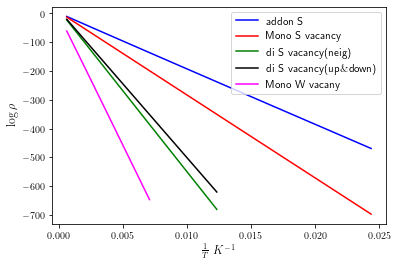

In [16]:
rho1=conc(addS,1)
rho2=conc(VS,1)
rho3=conc(VS22,6)
rho4=conc(VS2,6)
rho5=conc(VW,1)

T=arange(1,1600,20)

plt.plot(1/T,np.log(rho1) , 'b', label='addon S')
plt.plot(1/T, np.log(rho2), 'r', label='Mono S vacancy') 
plt.plot(1/T, np.log(rho3), 'g', label='di S vacancy(neig)') 
plt.plot(1/T, np.log(rho4), 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(1/T, np.log(rho5), 'magenta', label='Mono W vacany') 
plt.xlabel(r'$\frac{1}{T}$ $ K^{-1}$', fontsize=12)
plt.ylabel(r'$\log\rho $', fontsize=12)
plt.legend(fontsize=11)
#plt.xlim(1/800,1/1600)
plt.savefig('logarithm_rho.pdf')  
plt.show()

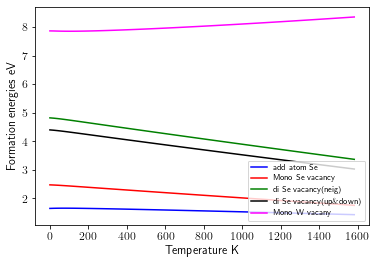

In [17]:
T=arange(1,1600,20)
plt.plot(T, addS, 'b', label='add atom Se')
plt.plot(T, VS, 'r', label='Mono Se vacancy')
plt.plot(T, VS22, 'g', label='di Se vacancy(neig)') 
plt.plot(T, VS2, 'k', label=r'di Se vacancy(up$\&$down)')
plt.plot(T, VW, 'magenta', label='Mono W vacany') 
plt.xlabel('Temperature K', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(loc='lower right',fontsize=8)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_T_2.png',dpi=400)
plt.show()

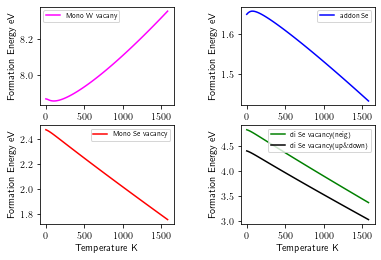

In [18]:
T=arange(1,1600,20)
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)
axs[0, 0].plot(T, VW, 'magenta', label='Mono W vacany')
axs[0, 0].legend(fontsize=7)
axs[0, 1].plot(T, addS, 'b', label='addon Se')
axs[0, 1].legend(fontsize=7)
axs[1, 0].plot(T, VS, 'r', label='Mono Se vacancy')
axs[1, 0].legend(fontsize=7)
axs[1, 1].plot(T, VS22, 'g', label='di Se vacancy(neig)')
axs[1, 1].plot(T, VS2, 'k', label=r'di Se vacancy(up$\&$down)')
axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel='Formation Energy eV')

plt.savefig('Ef_2_T.png',dpi=400)  

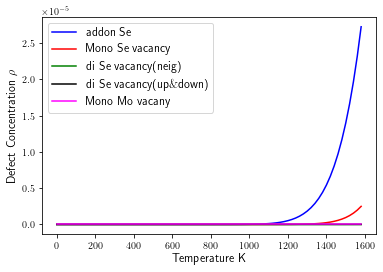

In [19]:
T=arange(1,1600,20)
plt.plot(T,rho1 , 'b', label='addon Se')
plt.plot(T, rho2, 'r', label='Mono Se vacancy') 
plt.plot(T, rho3, 'g', label='di Se vacancy(neig)') 
plt.plot(T, rho4, 'k', label=r'di Se vacancy(up$\&$down)') 
plt.plot(T, rho5, 'magenta', label='Mono Mo vacany') 

plt.xlabel('Temperature K', fontsize=12)
plt.ylabel(r'Defect Concentration $\rho$', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('rho_T.png',dpi=400)
plt.show()

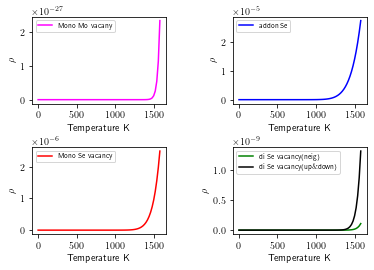

In [20]:
fig, axs = plt.subplots(2, 2)
T=arange(1,1600,20)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
axs[0, 0].plot(T, rho5, 'magenta', label='Mono Mo vacany')
axs[0, 0].legend(fontsize=7)
axs[0, 1].plot(T, rho1, 'b', label='addon Se')
axs[0, 1].legend(fontsize=7)
axs[1, 0].plot(T, rho2, 'r', label='Mono Se vacancy')
axs[1, 0].legend(fontsize=7)
axs[1, 1].plot(T, rho3, 'g', label='di Se vacancy(neig)')
axs[1, 1].plot(T, rho4, 'k', label=r'di Se vacancy(up$\&$down)')
axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel=r'$\rho$')

plt.savefig('rho_2_T_2.png',dpi=400) 